In [3]:
#LAB 7
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape data to add a channel dimension (28x28x1 for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Step 2: Build the CNN model
model = Sequential([
 Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D(pool_size=(2, 2)),
 Conv2D(64, kernel_size=(3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(10, activation='softmax')
])
# Step 3: Compile the model
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
# Step 4: Train the model
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=64,
 validation_data=(x_test, y_test))
# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
# Step 6: Predict on sample data
predictions = model.predict(x_test[:5])
for i, prediction in enumerate(predictions):
    print(f"Sample {i} - Predicted Label: {tf.argmax(prediction).numpy()}, True Label:{tf.argmax(y_test[i]).numpy()}")

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8389 - loss: 0.5062 - val_accuracy: 0.9822 - val_loss: 0.0530
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9701 - loss: 0.0995 - val_accuracy: 0.9877 - val_loss: 0.0368
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9792 - loss: 0.0685 - val_accuracy: 0.9874 - val_loss: 0.0402
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9903 - val_loss: 0.0290
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9909 - val_loss: 0.0260
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9870 - loss: 0.0415 - val_accuracy: 0.9922 - val_loss: 0.0252
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0

In [11]:
#LAB 8
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Step 1: Load and preprocess the dataset
# Load the IMDB dataset with top 10,000 most common words
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)
# Step 2: Build the RNN model
model = Sequential([
 Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
 SimpleRNN(128, activation='tanh', return_sequences=False),
 Dropout(0.5),
 Dense(64, activation='relu'),
 Dropout(0.5),
 Dense(1, activation='sigmoid')
])
# Step 3: Compile the model
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])
# Step 4: Train the model
history = model.fit(x_train, y_train,
 epochs=5,
 batch_size=64,
 validation_data=(x_test, y_test))
# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
# Step 6: Predict sentiment for a sample review
sample_review == "This movie was fantastic! The characters were well-developed and the plot was thrilling."

# Tokenize and pad the sample review
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in tokenizer.items()}
encoded_review = [tokenizer.get(word, 2) for word in sample_review.lower().split()]
padded_review = pad_sequences([encoded_review], maxlen=max_length)
# Predict sentiment
prediction = model.predict(padded_review)
sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment}")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5020 - loss: 0.7303 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5052 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5278 - loss: 0.6899 - val_accuracy: 0.5008 - val_loss: 0.6920
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5330 - loss: 0.6945 - val_accuracy: 0.6372 - val_loss: 0.6288
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6885 - loss: 0.5955 - val_accuracy: 0.6395 - val_loss: 0.6335
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6395 - loss: 0.6354
Test Accuracy: 0.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted Sentiment: Negative


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0084 - val_loss: 8.2342e-04
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.0274e-04 - val_loss: 9.1594e-04
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.5714e-04 - val_loss: 4.3359e-04
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.3089e-04 - val_loss: 6.0149e-04
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.7848e-04 - val_loss: 0.0012
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.9665e-04 - val_loss: 5.0875e-04
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.0662e-04 - val_loss: 6.9044e-04
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.2472e-04 - val_loss: 4.2575e-04
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.0485e-04 - val_loss: 0.0012
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.7306e-04 - val_loss: 7.0801e-04
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.9741e-04 - val_loss: 4.3828e-0

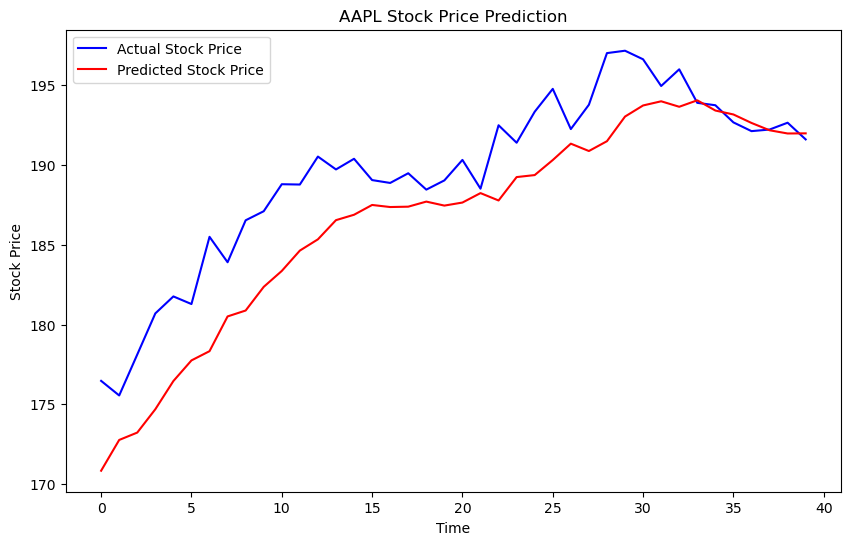

In [12]:
#LAB 9
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Step 1: Fetch Stock Data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Preprocess Data
def preprocess_data(stock_data, feature='Close', look_back=60):
    data = stock_data[feature].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    x, y = [], []
    for i in range(look_back, len(scaled_data)):
        x.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y, scaler

# Step 3: Build GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 4: Main Execution
ticker = "AAPL"  # Replace with desired ticker
start_date = "2010-01-01"
end_date = "2023-12-31"

# Fetch and preprocess data
data = fetch_stock_data(ticker, start_date, end_date)
x_train, y_train, scaler = preprocess_data(data)

# Split into train and validation sets (80-20 split)
split_index = int(0.8 * len(x_train))
x_val, y_val = x_train[split_index:], y_train[split_index:]
x_train, y_train = x_train[:split_index], y_train[:split_index]

# Build and train model
model = build_gru_model(input_shape=(x_train.shape[1], 1))
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

# Step 5: Predict and Visualize
test_data = data['Close'].values[-100:].reshape(-1, 1)  # Last 100 data points
scaled_test_data = scaler.transform(test_data)

# Prepare test input
test_x = []
look_back = 60
for i in range(look_back, len(scaled_test_data)):
    test_x.append(scaled_test_data[i-look_back:i, 0])
test_x = np.array(test_x)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

# Predict
predicted = model.predict(test_x)
predicted = scaler.inverse_transform(predicted)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data['Close'][-len(predicted):].values, color='blue', label='Actual Stock Price')
plt.plot(predicted, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0558
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0051
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoch 16/50
62/

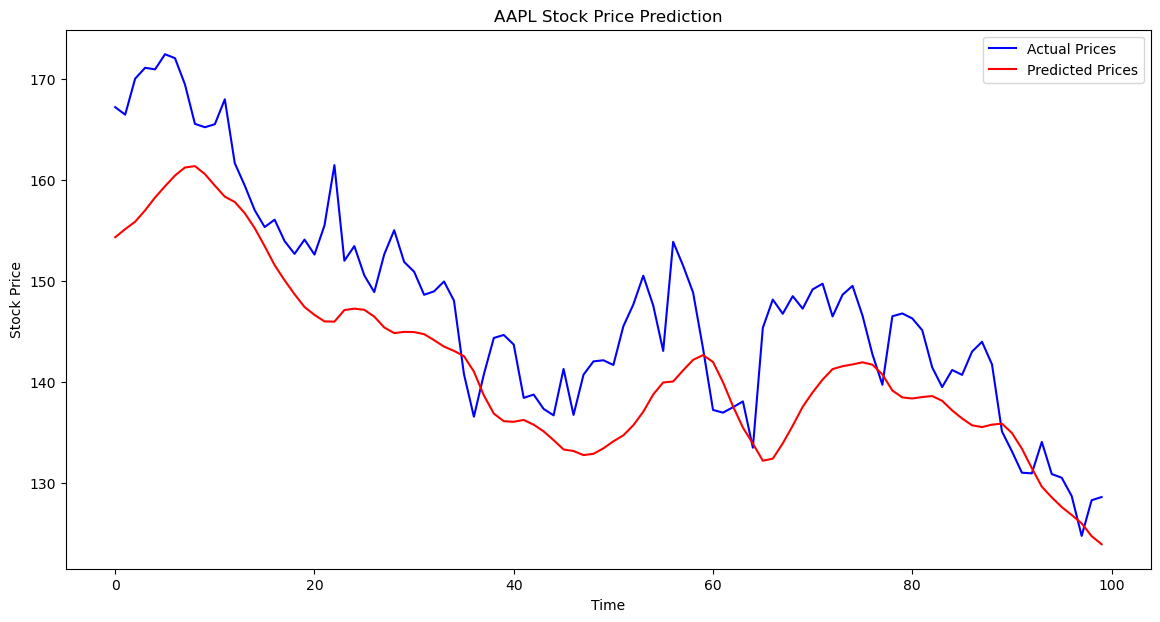

In [8]:
#LAB 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Step 1: Fetch and preprocess the stock market data
# Fetch historical stock price data
ticker = "AAPL" # Replace with your desired stock symbol
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
prices = data["Close"].values.reshape(-1, 1)
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)
# Prepare training data
sequence_length = 60 # Use the last 60 days to predict the next day's price
x_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
 x_train.append(scaled_data[i-sequence_length:i, 0])
 y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Reshape for LSTM
input
# Step 2: Build the LSTM model
model = Sequential([
 LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
 Dropout(0.2),
 LSTM(50, return_sequences=False),
 Dropout(0.2),
 Dense(25),
 Dense(1)
])
# Step 3: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Step 4: Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)
# Step 5: Test the model
# Create test data
test_data = scaled_data[len(scaled_data) - sequence_length - 100:] # Last 100 days for testing
x_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
 x_test.append(test_data[i-sequence_length:i, 0])
 y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get model predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) # Inverse scaling
# Step 6: Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(data["Close"].values[-len(y_test):], color="blue", label="Actual Prices")
plt.plot(predicted_prices, color="red", label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()